# Problem Statement

classify the Size_Categorie using SVM

month:	month of the year: 'jan' to 'dec'

day:	day of the week: 'mon' to 'sun'

FFMC:	FFMC index from the FWI system: 18.7 to 96.20

DMC:	DMC index from the FWI system: 1.1 to 291.3

DC:	    DC index from the FWI system: 7.9 to 860.6

ISI:	ISI index from the FWI system: 0.0 to 56.10

temp:	temperature in Celsius degrees: 2.2 to 33.30

RH: 	relative humidity in %: 15.0 to 100

wind:	wind speed in km/h: 0.40 to 9.40

rain:	outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie: the burned area of the forest ( Small , Large)

# Step 1: Import required libraries...

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Preprecoseeing..

In [2]:
dataset = pd.read_csv('forestfires.csv')

In [3]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
dataset.shape

(517, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
# label encoding

def label_encoding(datafeed):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in datafeed.select_dtypes(include=object).columns:
        datafeed[i]= label_encoder.fit_transform(datafeed.select_dtypes(include=object)[i]) 
        
    return datafeed.head()

In [7]:
label_encoding(dataset)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
dataset.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [11]:
x = dataset.drop(['size_category'], axis=1)
x.shape

(517, 30)

In [12]:
y = dataset['size_category']
y.shape

(517,)

# Data transformation..


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

x_std_scale = StandardScaler().fit_transform(x)
x_min_max_scale = MinMaxScaler().fit_transform(x)
x_normalizer_scale = Normalizer().fit_transform(x)

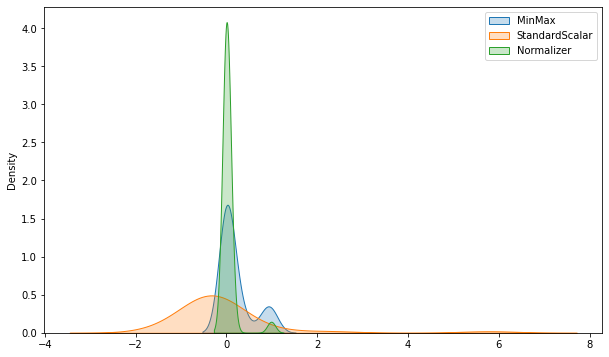

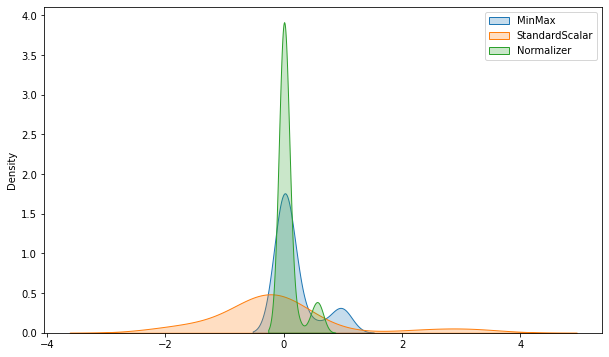

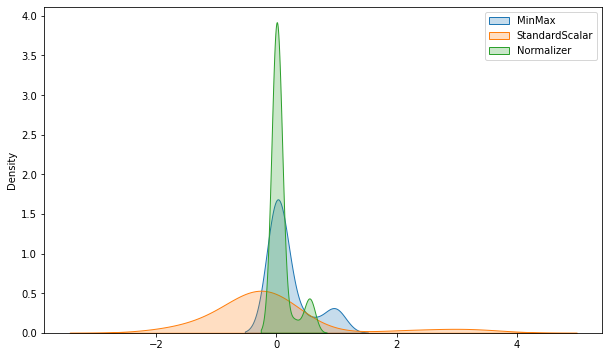

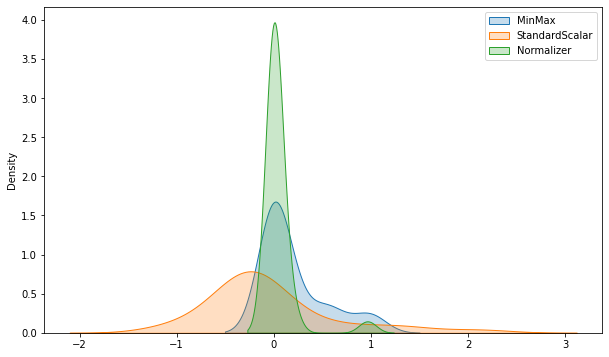

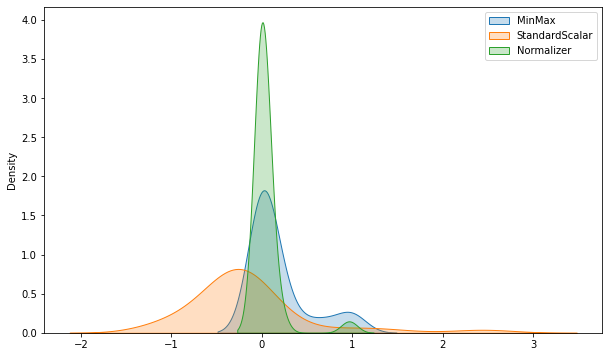

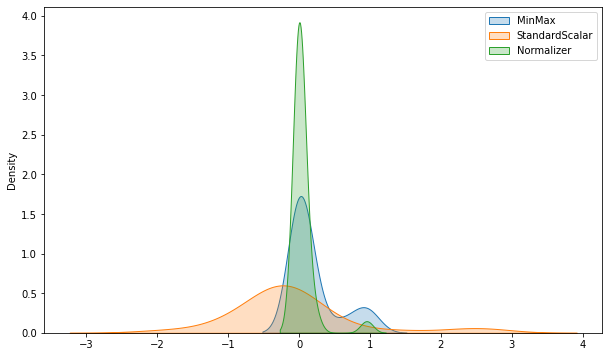

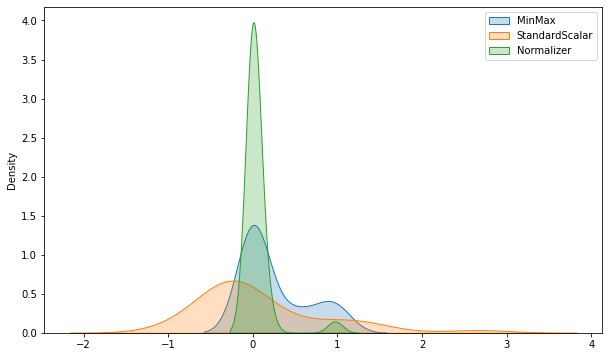

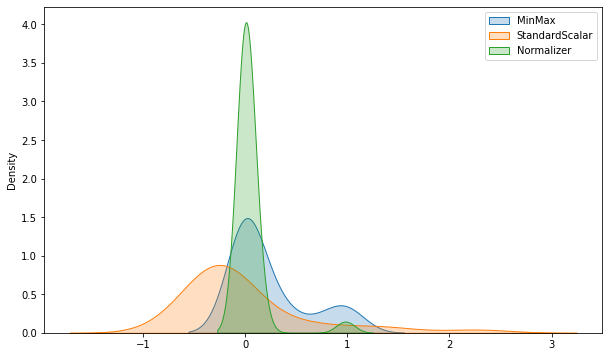

In [14]:
# plotting out different transformation graph

list1 = [2, 3, 4, 5, 6, 7, 8, 9] #index list of object columns
for i in list1:
    plt.figure(figsize=(10,6))
    sns.kdeplot(x_min_max_scale[i], shade=True)
    sns.kdeplot(x_std_scale[i], shade=True)
    sns.kdeplot(x_normalizer_scale[i], shade=True)
    plt.legend(['MinMax', 'StandardScalar', 'Normalizer'])
    plt.show()

# spliiting the data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, stratify = y, test_size= 0.20, random_state =42)


# Model Building

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [50]:
clf_std = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42, n_components= 0.95)),
    ('svm', SVC(kernel = 'rbf', random_state = 42))
])


clf_norm = Pipeline([
    ('norm', Normalizer()),
    ('pca', PCA(random_state=42, n_components= 0.95)),
    ('svm', SVC(kernel = 'rbf', random_state = 42))
])

clf_minmax = Pipeline([
    ('minmax', MinMaxScaler()),
    ('pca', PCA(random_state=42, n_components= 0.95)),
    ('svm', SVC(kernel = 'rbf', random_state = 42))
])

In [51]:
clf_std.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('svm', SVC(random_state=42))])

In [52]:
clf_norm.fit(x_train, y_train)

Pipeline(steps=[('norm', Normalizer()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('svm', SVC(random_state=42))])

In [53]:
clf_minmax.fit(x_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('svm', SVC(random_state=42))])

In [54]:
final_df = pd.DataFrame({
    'models':['clf_std','clf_norm', 'clf_minmax'],
    'transformation':['StandardScalar', 'Normalizer', 'MinMax'],
    'train_score':[clf_std.score(x_train, y_train),clf_norm.score(x_train, y_train),
                   clf_minmax.score(x_train, y_train)],
    'test_score':[clf_std.score(x_test, y_test),clf_norm.score(x_test, y_test),
                  clf_minmax.score(x_test, y_test)],
    'cross_value_score':[np.mean(cross_val_score(clf_std, x, y, cv=4, n_jobs=-1)), 
                         np.mean(cross_val_score(clf_norm, x, y, cv=4, n_jobs=-1)),
                        np.mean(cross_val_score(clf_minmax, x, y, cv=4, n_jobs=-1))]
})
    

# Results..

In [49]:
# with pca & transformations...

final_df.round(2)

,models,transformation,train_score,test_score,cross_value_score
0,clf_std,StandardScalar,0.79,0.75,0.76
1,clf_norm,Normalizer,0.78,0.77,0.78
2,clf_minmax,MinMax,0.75,0.74,0.73


In [56]:
clf_std_ex = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel = 'rbf', random_state = 42))
])


clf_norm_ex = Pipeline([
    ('norm', Normalizer()),
    ('svm', SVC(kernel = 'rbf', random_state = 42))
])

clf_minmax_ex = Pipeline([
    ('minmax', MinMaxScaler()),
    ('svm', SVC(kernel = 'rbf', random_state = 42))
])

In [57]:
clf_std_ex.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

In [58]:
clf_norm_ex.fit(x_train, y_train)

Pipeline(steps=[('norm', Normalizer()), ('svm', SVC(random_state=42))])

In [59]:
clf_minmax_ex.fit(x_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()), ('svm', SVC(random_state=42))])

In [60]:
final_df_ex = pd.DataFrame({
    
    'models_ex':['clf_std_ex','clf_norm_ex', 'clf_minmax_ex'],
    
    'transformation':['StandardScalar', 'Normalizer', 'MinMax'],
    
    'train_score':[clf_std_ex.score(x_train, y_train),clf_norm_ex.score(x_train, y_train),
                   clf_minmax_ex.score(x_train, y_train)],
    
    'test_score':[clf_std_ex.score(x_test, y_test),clf_norm_ex.score(x_test, y_test),
                  clf_minmax_ex.score(x_test, y_test)],
    
    'cross_value_score':[np.mean(cross_val_score(clf_std_ex, x, y, cv=4, n_jobs=-1)), 
                         np.mean(cross_val_score(clf_norm_ex, x, y, cv=4, n_jobs=-1)),
                        np.mean(cross_val_score(clf_minmax_ex, x, y, cv=4, n_jobs=-1))]
})

In [61]:
final_df_ex

,models_ex,transformation,train_score,test_score,cross_value_score
0,clf_std_ex,StandardScalar,0.789346,0.750000,0.760212
1,clf_norm_ex,Normalizer,0.784504,0.769231,0.775671
2,clf_minmax_ex,MinMax,0.750605,0.740385,0.733080


In [67]:
final_df

,models,transformation,train_score,test_score,cross_value_score
0,clf_std,StandardScalar,0.784504,0.750000,0.760212
1,clf_norm,Normalizer,0.830508,0.807692,0.824106
2,clf_minmax,MinMax,0.740920,0.730769,0.729204


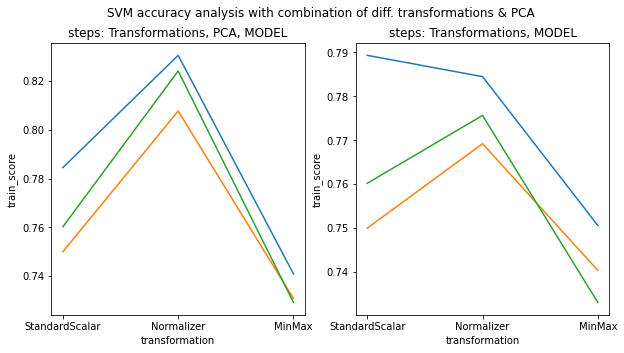

In [97]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(x='transformation', y='train_score',ax=ax1, data=final_df)
sns.lineplot(x='transformation', y='test_score',ax=ax1, data=final_df)
sns.lineplot(x='transformation', y='cross_value_score',ax=ax1, data=final_df)

sns.lineplot(x='transformation', y='train_score',ax=ax2, data=final_df_ex)
sns.lineplot(x='transformation', y='test_score',ax=ax2, data=final_df_ex)
sns.lineplot(x='transformation', y='cross_value_score',ax=ax2, data=final_df_ex)

print()
plt.suptitle('SVM accuracy analysis with combination of diff. transformations & PCA')
ax1.title.set_text('steps: Transformations, PCA, MODEL')
ax2.title.set_text('steps: Transformations, MODEL')
plt.show()
